In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from io import StringIO
import glob
import os
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress

import scipy.optimize as spo
import scipy.constants as spc
import scipy.integrate as spi
import scipy.linalg as spl
import scipy.signal as spsi
import scipy.stats as spst

In [5]:
energie_rouge_vert = [0.8695, 0.8046, 0.3691, 0.2407]
sigma_rouge_vert = [0.0666, 0.0258, 0.0486, 0.0185]

energie_rouge_rouge= [0.193, 0.0899, 0.0571, 0.0293]
sigma_rouge_rouge = [0.0091, 0.0049, 0.0032, 0.0035]

energie_rouge_noir = [0.5105, 0.3617, 0.2817, 0.1785]
sigma_rouge_noir = [0.0098, 0.0076, 0.0053, 0.007]

energie_vert_rouge = [0.7240,0.4991,0.3583,0.1868]
sigma_vert_rouge = [0.0222, 0.0102,0.0086,0.0065]

energie_vert_vert = [0.4736, 0.3637, 0.2688, 0.1760]
sigma_vert_vert = [0.0113, 0.0062, 0.0055, 0.0056]

energie_vert_noir = [0.4822, 0.3631, 0.2750, 0.1765]
sigma_vert_noir = [0.0105, 0.0078, 0.0045, 0.0052]

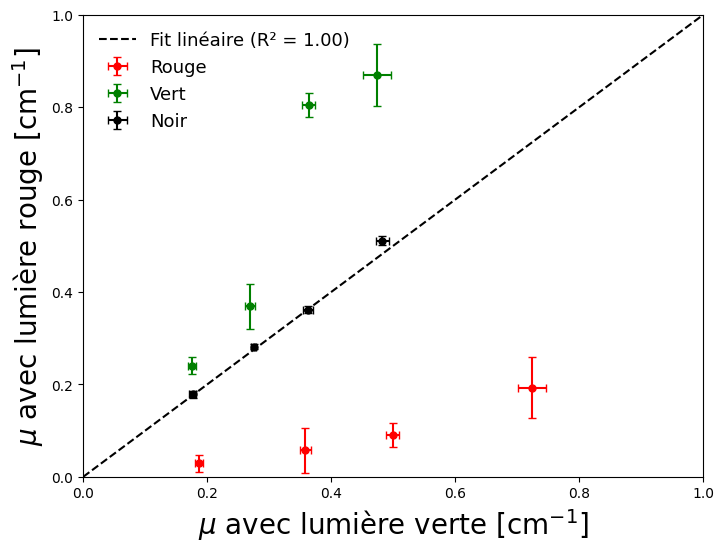

In [6]:
plt.figure(figsize=(8, 6))

plt.errorbar(energie_vert_rouge, energie_rouge_rouge, yerr=sigma_rouge_vert, xerr=sigma_vert_rouge, color = 'red', marker='o',  markersize=5, capsize = 3, linestyle='', label='Rouge')
plt.errorbar(energie_vert_vert, energie_rouge_vert, yerr=sigma_rouge_vert, xerr=sigma_vert_rouge, color = 'green', marker='o', linestyle='',  markersize=5, capsize = 3, label='Vert')
plt.errorbar(energie_vert_noir, energie_rouge_noir, yerr=sigma_rouge_noir, xerr=sigma_vert_noir, color = 'black', marker='o', markersize=5, capsize = 3, linestyle='', label='Noir')


x_2d = np.array(energie_rouge_noir)
y_2d = np.array(energie_rouge_noir)
slope_2d, intercept_2d, r_value_2d, _, _ = linregress(x_2d, y_2d)
r_squared_2d = r_value_2d ** 2

x_values = np.linspace(0, 1.0, 50)

plt.plot(x_values, slope_2d * x_values + intercept_2d, color='black', linestyle='--', label=f'Fit linéaire (R² = {r_squared_2d:.2f})')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("$\mu$ avec lumière verte [cm$^{-1}$]", fontsize=20)
plt.ylabel("$\mu$ avec lumière rouge [cm$^{-1}$]", fontsize=20)
plt.legend(frameon=False, fontsize=13, loc='upper left')

plt.show()
